Consider the heart-disease.csv dataset available at the course webpage’s homework tab.
Using sklearn, apply a 5-fold stratified cross-validation with shuffling (random_state=0) for the
assessment of predictive models along this section.

1) Compare the performance of a with and a naïve Bayes with Gaussian𝑘𝑁𝑁 𝑘 = 5
assumption (consider all remaining parameters as default):

a. [1.0v] Plot two boxplots with the fold accuracies for each classifier. Is there one
more stable than the other regarding performance? Why do you think that is the
case? Explain.

C:\Users\david\AppData\Local\Temp\ipykernel_15316\1668502232.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([knn_accuracies, nb_accuracies], labels=['k-NN (k=5)', 'Naïve Bayes (Gaussian)'])


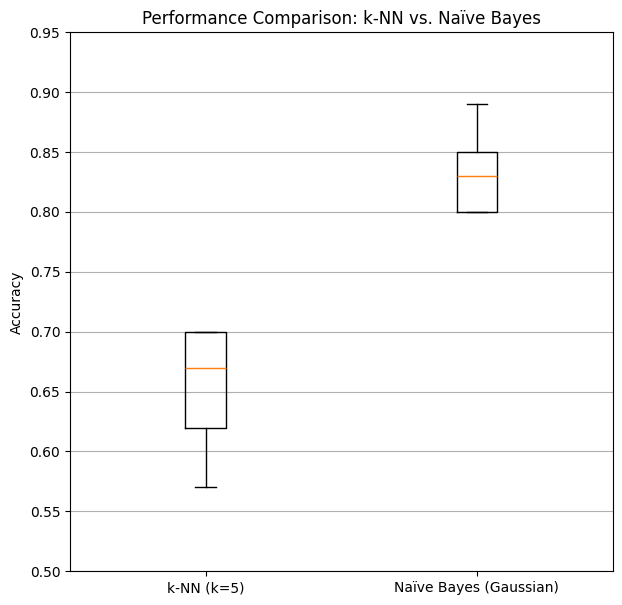

In [2]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

# Reading the CSV file
df = pd.read_csv('heart-disease.csv')

X = df.drop('target', axis=1)
y = df['target']

knn_predictor = KNeighborsClassifier(n_neighbors=5)
nb_predictor = GaussianNB()

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
knn_accuracies = []
nb_accuracies = []


# iterate per fold
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # train and assess k-NN
    knn_predictor.fit(X_train, y_train)
    y_pred = knn_predictor.predict(X_test)
    knn_accuracies.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
    # train and assess Naïve Bayes with Gaussian assumption
    nb_predictor.fit(X_train, y_train)
    y_pred = nb_predictor.predict(X_test)
    nb_accuracies.append(round(metrics.accuracy_score(y_test, y_pred),2))


# plots
plt.figure(figsize=(7, 7))
plt.boxplot([knn_accuracies, nb_accuracies], labels=['k-NN (k=5)', 'Naïve Bayes (Gaussian)'])
plt.title('Performance Comparison: k-NN vs. Naïve Bayes')
plt.ylabel('Accuracy')
plt.ylim(0.5, 0.95)
plt.grid(axis='y')
plt.show()

O modelo Naïve Bayes tem consistentemente maior precisão em comparação com o modelo k-NN. O modelo k-NN exibe maior variabilidade no desempenho, como indicado pela maior dispersão no boxplot. O modelo Naïve Bayes é mais estável em termos de desempenho, provavelmente devido à sua natureza probabilística, enquanto a precisão do k-NN depende mais da estrutura local dos dados e é mais sensível ao tamanho e distribuição dos vizinhos. 

b.  [1.0v] Report the accuracy of both models, this time scaling the data with a
Min-Max scaler before training the models. Explain the impact that this
preprocessing step has on the performance of each model, providing an
explanation for the results.

k-NN accuracies (scaled): [0.84, 0.8, 0.84, 0.83, 0.78]
Naïve Bayes accuracies (scaled): [0.89, 0.8, 0.8, 0.85, 0.83]


C:\Users\david\AppData\Local\Temp\ipykernel_15316\1340077228.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([knn_accuracies, nb_accuracies], labels=['k-NN (k=5)', 'Naïve Bayes (Gaussian)'])


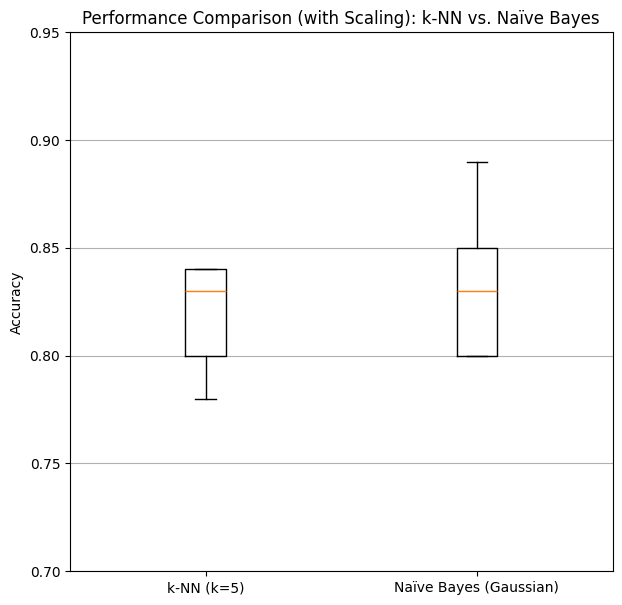

In [3]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt

# Reading the CSV file
df = pd.read_csv('heart-disease.csv')

X = df.drop('target', axis=1)
y = df['target']

# Initializing the models
knn_predictor = KNeighborsClassifier(n_neighbors=5)
nb_predictor = GaussianNB()

# Stratified k-folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
knn_accuracies = []
nb_accuracies = []

# Min-Max Scaler
scaler = MinMaxScaler()

# iterate per fold
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]

    # Scaling the data using Min-Max Scaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train and assess k-NN
    knn_predictor.fit(X_train_scaled, y_train)
    y_pred_knn = knn_predictor.predict(X_test_scaled)
    knn_accuracies.append(round(metrics.accuracy_score(y_test, y_pred_knn), 2))
    
    # Train and assess Naïve Bayes with Gaussian assumption
    nb_predictor.fit(X_train_scaled, y_train)
    y_pred_nb = nb_predictor.predict(X_test_scaled)
    nb_accuracies.append(round(metrics.accuracy_score(y_test, y_pred_nb), 2))

# Report the accuracy
print("k-NN accuracies (scaled):", knn_accuracies)
print("Naïve Bayes accuracies (scaled):", nb_accuracies)

# Boxplot to compare
plt.figure(figsize=(7, 7))
plt.boxplot([knn_accuracies, nb_accuracies], labels=['k-NN (k=5)', 'Naïve Bayes (Gaussian)'])
plt.title('Performance Comparison (with Scaling): k-NN vs. Naïve Bayes')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.95)
plt.grid(axis='y')
plt.show()


O desempenho do k-NN melhorou significativamente após a escala, mostrando precisões mais altas e consistentes em todos os folds.
O desempenho do Naïve Bayes permaneceu relativamente estável, sem mudanças perceptíveis após a escala.
Isso indica que o k-NN é mais sensível à escala dos dados, provavelmente porque depende de métricas de distância, enquanto o Naïve Bayes não depende de distância e, portanto, é menos afetado pela escala das características.

c. [1.0v] Using scipy, test the hypothesis “the model is statistically superior to𝑘𝑁𝑁
naïve Bayes regarding accuracy”, asserting whether it is true.

In [4]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from scipy import stats

# Reading the CSV file
df = pd.read_csv('heart-disease.csv')

X = df.drop('target', axis=1)
y = df['target']

knn_predictor = KNeighborsClassifier(n_neighbors=5)
nb_predictor = GaussianNB()

# 10-fold stratified cross-validator with shuffling
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

knn_accuracies = []
nb_accuracies = []

# iterate per fold
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # train and assess k-NN
    knn_predictor.fit(X_train, y_train)
    y_pred = knn_predictor.predict(X_test)
    knn_accuracies.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
    # train and assess Naïve Bayes with Gaussian assumption
    nb_predictor.fit(X_train, y_train)
    y_pred = nb_predictor.predict(X_test)
    nb_accuracies.append(round(metrics.accuracy_score(y_test, y_pred),2))


# 𝑘NN is better than naïve Bayes?
res = stats.ttest_rel(knn_accuracies, nb_accuracies, alternative='greater')
print("𝑘NN > naïve Bayes? pval=",res.pvalue)

𝑘NN > naïve Bayes? pval= 0.998415501126768



𝑘NN > naïve Bayes? pval= 0.998415501126768
como pval > valores de significancia usuais (ou seja, pval é superior a 0.01, 0.05 e 0.1), não é possível rejeitar a hipótese nula e afirmar que o kNN é estatisticamente superior ao Naive Bayes.


2) Using a 80-20 train-test split, vary the number of neighbors of a classifier using𝑘𝑁𝑁
. Additionally, for each , train one classifier using uniform weights𝑘 = {1, 5, 10, 20, 30} 𝑘
and distance weights.

a. [1.0v] Plot the train and test accuracy for each model

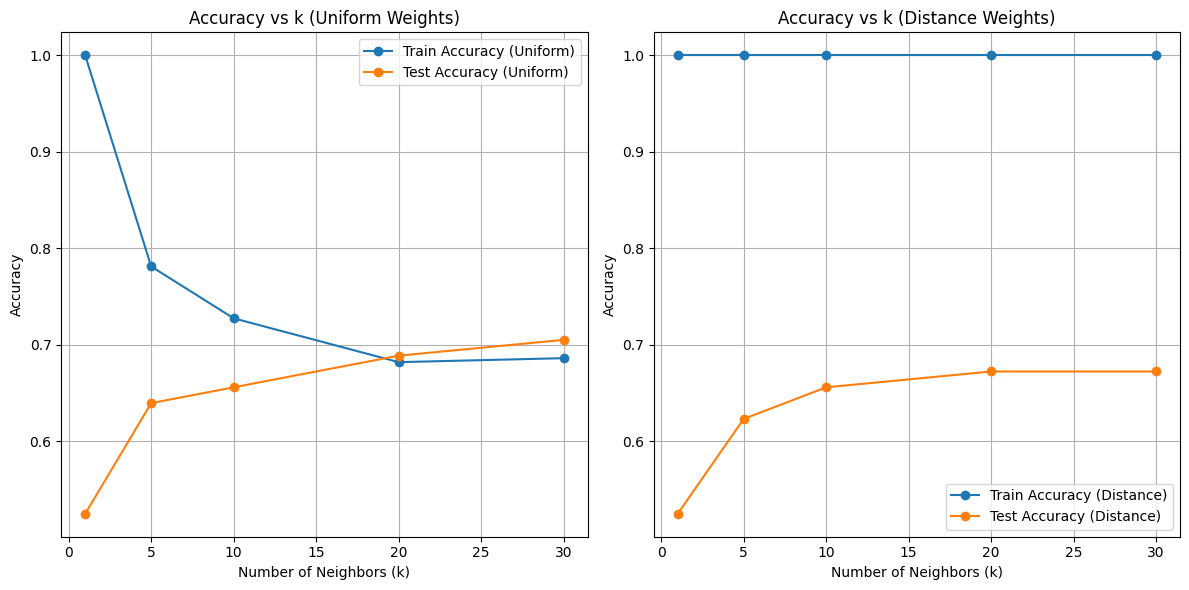

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Reading the CSV file
df = pd.read_csv('heart-disease.csv')

X = df.drop('target', axis=1)
y = df['target']

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# List of k values to try
k_values = [1, 5, 10, 20, 30]

# Store accuracies
train_accuracies_uniform = []
test_accuracies_uniform = []
train_accuracies_distance = []
test_accuracies_distance = []

# Iterate over each k value
for k in k_values:
    # Uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    train_acc_uniform = metrics.accuracy_score(y_train, knn_uniform.predict(X_train))
    test_acc_uniform = metrics.accuracy_score(y_test, knn_uniform.predict(X_test))
    train_accuracies_uniform.append(train_acc_uniform)
    test_accuracies_uniform.append(test_acc_uniform)
    
    # Distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    train_acc_distance = metrics.accuracy_score(y_train, knn_distance.predict(X_train))
    test_acc_distance = metrics.accuracy_score(y_test, knn_distance.predict(X_test))
    train_accuracies_distance.append(train_acc_distance)
    test_accuracies_distance.append(test_acc_distance)

# Plot the results
plt.figure(figsize=(12, 6))

# Uniform weights plot
plt.subplot(1, 2, 1)
plt.plot(k_values, train_accuracies_uniform, marker='o', label='Train Accuracy (Uniform)')
plt.plot(k_values, test_accuracies_uniform, marker='o', label='Test Accuracy (Uniform)')
plt.title('Accuracy vs k (Uniform Weights)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Distance weights plot
plt.subplot(1, 2, 2)
plt.plot(k_values, train_accuracies_distance, marker='o', label='Train Accuracy (Distance)')
plt.plot(k_values, test_accuracies_distance, marker='o', label='Test Accuracy (Distance)')
plt.title('Accuracy vs k (Distance Weights)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


b. [1.5v] Explain the impact of increasing the neighbors on the generalization ability of
the models.

Pesos Uniformes (Gráfico 1 à Esquerda):

k=1: O modelo apresenta uma acurácia de treino perfeita, mas a acurácia de teste é baixa. Este é um claro indicativo de overfitting, onde o modelo está a memorizar os dados de treino, mas falha em generalizar para dados de teste.
k=5 a k=10: Observa-se uma melhoria na acurácia de teste. 
k>10: À medida que k aumenta, a acurácia de treino vai aumentando ultrapassando a acuracia de treino em k=20. Este diminuição da acuracia de treino e aumento lento da acuracia de teste pode sugerir uma leve tendência de underfitting, onde, com muitos vizinhos, o modelo perde a capacidade de capturar variações locais nos dados.
Pesos Baseados na Distância (Gráfico 2 à Direita):

k=1: O modelo novamente apresenta acurácia de treino perfeita, mas a acurácia de teste permanece baixa, semelhante ao caso anterior.
k=5 a k=10: Para valores intermediários de k, especialmente até de k=10,a curacia de teste é semelhante ao modelo com pesos uniformes.
k>10: Com k maior que 10, a acurácia de teste estabiliza. Embora a acurácia de treino continue constante em 1.0, o impacto de atribuir pesos mais altos aos vizinhos mais próximos ajuda a mitigar a queda na acurácia de teste, mantendo um grau de localidade nas decisões.

Impacto no Poder de Generalização: Aumentar o número de vizinhos tende a suavizar o modelo, reduzindo o overfitting e melhorando a generalização até certo ponto. Contudo, quando k é excessivamente grande, pode resultar em underfitting, levando a uma queda na acurácia tanto de treino quanto de teste(neste caso nao acontece redução da acuracia de treino).

O uso de pesos baseados na distância atenua o impacto negativo de um aumento excessivo de vizinhos, já que o modelo ainda prioriza os vizinhos mais próximos, preservando um nível de localidade nas suas decisões.

Resumindo, aumentar k ajuda a reduzir o overfitting, mas um valor muito elevado pode resultar em underfitting. O uso de pesos por distância geralmente melhora a generalização para valores maiores de k.

3) [1.5v] Considering the unique properties of the heart-disease.csv dataset, identify two
possible difficulties of the naïve Bayes model used in the previous exercises when learning
from the given dataset.

O Naïve Bayes supoem que todas as características (features) são independentes entre si, para uma dada classe alvo. Porem, no conjunto de dados de doenças cardíacas, é provável que muitas das características sejam correlacionadas. Por exemplo, variáveis como nível de colesterol, pressão arterial e idade podem ter dependências entre si, o que viola essa suposição de independência. Isto pode penalizar o desempenho do modelo Naïve Bayes, que não consegue modelar essas correlações entre os features.

Este modelo assume que os dados numéricos seguem uma distribuição normal (gaussiana). Se as features numéricas do conjunto de dados de doenças cardíacas não seguirem a distribuição normal (forem muito assimétricos, ou tiverem outras distribuições), o Naïve Bayes pode não se ajustar bem aos dados. Dados como níveis de colesterol ou idade podem não seguir uma distribuição normal, podendo diminuir a capacidade do modelo de fazer previsões precisas.
